# Example A: The Vowel data set from our textbook, also see the homepage

https://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.info.txt

Reference for Python Implementation: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html


## read Table

vowel.train <- read.table("http://www2.isye.gatech.edu/~ymei/7406/Handouts/vowel.train.csv",  header= TRUE, sep = ",");

vowel.test <- read.table("http://www2.isye.gatech.edu/~ymei/7406/Handouts/vowel.test.csv",  header= TRUE, sep = ",");


#vowel.train <- read.table(file = "C:/myajun/Teaching/7406/data/vowel.train.csv", header= T, sep = ",")
#vowel.test <- read.table(file = "C:/myajun/Teaching/7406/data/vowel.test.csv",  header= T, sep = ",")


In [2]:
## read the data from given URL
import pandas as pd
import numpy as np


url_train = "http://www2.isye.gatech.edu/~ymei/7406/Handouts/vowel.train.csv"
vowel_train = pd.read_csv(url_train)

url_test = "http://www2.isye.gatech.edu/~ymei/7406/Handouts/vowel.test.csv"
vowel_test = pd.read_csv(url_test)

vowel_train.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [3]:
X_train = vowel_train.iloc[:, 1:]
y_train = vowel_train.iloc[:, 0]

X_test = vowel_test.iloc[:, 1:]
y_test = vowel_test.iloc[:, 0]

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

%matplotlib inline

# Method A1: LDA

In [11]:
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)

print(model.priors_)

[0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]


In [12]:
print(model.means_)

[[-3.3595625   0.0629375  -0.2940625   1.20333333  0.38747917  1.22189583
   0.096375    0.03710417 -0.62435417 -0.161625  ]
 [-2.708875    0.49060417 -0.58022917  0.8135      0.2019375   1.06347917
  -0.19091667  0.3738125  -0.51595833  0.08060417]
 [-2.44025     0.774875   -0.79839583  0.80866667  0.04245833  0.56925
  -0.2800625   0.20495833 -0.47827083  0.181875  ]
 [-2.22660417  1.52583333 -0.8744375   0.42214583 -0.3713125   0.24835417
  -0.01895833  0.10714583 -0.32627083 -0.05375   ]
 [-2.7563125   2.27595833 -0.46572917  0.2253125  -1.03679167  0.38979167
   0.23641667  0.424625   -0.20070833 -0.28070833]
 [-2.67354167  1.75877083 -0.4745625   0.3505625  -0.66585417  0.417
   0.16233333  0.22925    -0.2075      0.05270833]
 [-3.24372917  2.46835417 -0.1050625   0.39645833 -0.98029167  0.1623125
   0.01958333  0.76229167 -0.03027083 -0.12239583]
 [-4.05133333  3.23397917 -0.17397917  0.39658333 -1.04602083  0.1951875
   0.08666667  0.82077083  0.10445833  0.02122917]
 [-3.87689

In [13]:
pred= model.predict(X_test)
print(np.unique(pred, return_counts = True))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64), array([59, 41, 34, 48, 25, 75, 24, 33, 41, 36, 46], dtype=int64))


In [14]:
print(confusion_matrix(pred, y_test))

print(classification_report(y_test, pred, digits = 3))

[[28 23  0  0  0  0  0  0  0  8  0]
 [10 16 11  0  0  0  0  0  2  1  1]
 [ 1  2 16  2  0  5  1  0  0  5  2]
 [ 0  0 11 33  1  3  0  0  0  0  0]
 [ 0  0  0  0  7  8  9  1  0  0  0]
 [ 0  1  4  6 22 19 12  0  0  0 11]
 [ 0  0  0  0  9  1 11  2  0  0  1]
 [ 0  0  0  0  0  0  4 23  6  0  0]
 [ 3  0  0  0  0  0  4  8 15  9  2]
 [ 0  0  0  0  0  0  0  8 14 13  1]
 [ 0  0  0  1  3  6  1  0  5  6 24]]
              precision    recall  f1-score   support

           1      0.475     0.667     0.554        42
           2      0.390     0.381     0.386        42
           3      0.471     0.381     0.421        42
           4      0.688     0.786     0.733        42
           5      0.280     0.167     0.209        42
           6      0.253     0.452     0.325        42
           7      0.458     0.262     0.333        42
           8      0.697     0.548     0.613        42
           9      0.366     0.357     0.361        42
          10      0.361     0.310     0.333        42
        

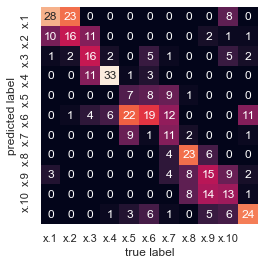

In [57]:
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=X_train.columns, yticklabels=X_train.columns)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Method A2: Quadratic Discriminant Analysis
We will now fit a QDA model . QDA is implemented in sklearn using the QuadraticDiscriminantAnalysis() function, which is again part of the discriminant_analysis module. The syntax is identical to that of LinearDiscriminantAnalysis().

In [15]:
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(X_train, y_train)

print(model2.priors_)
print(model2.means_)

[0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
[[-3.3595625   0.0629375  -0.2940625   1.20333333  0.38747917  1.22189583
   0.096375    0.03710417 -0.62435417 -0.161625  ]
 [-2.708875    0.49060417 -0.58022917  0.8135      0.2019375   1.06347917
  -0.19091667  0.3738125  -0.51595833  0.08060417]
 [-2.44025     0.774875   -0.79839583  0.80866667  0.04245833  0.56925
  -0.2800625   0.20495833 -0.47827083  0.181875  ]
 [-2.22660417  1.52583333 -0.8744375   0.42214583 -0.3713125   0.24835417
  -0.01895833  0.10714583 -0.32627083 -0.05375   ]
 [-2.7563125   2.27595833 -0.46572917  0.2253125  -1.03679167  0.38979167
   0.23641667  0.424625   -0.20070833 -0.28070833]
 [-2.67354167  1.75877083 -0.4745625   0.3505625  -0.66585417  0.417
   0.16233333  0.22925    -0.2075      0.05270833]
 [-3.24372917  2.46835417 -0.1050625   0.39645833 -0.98029167  0.1623125
   0.01958333  0.76229167 -0.03027083 -0.12239583]
 [-4.05133

The output contains the group means. But it does not contain the coefficients of the linear discriminants, because the QDA classifier involves a quadratic, rather than a linear, function of the predictors. The predict() function works in exactly the same fashion as for LDA.

In [16]:
pred2 = model2.predict(X_test)

print(np.unique(pred2, return_counts = True))

print(confusion_matrix(pred2, y_test))

print(classification_report(y_test, pred2, digits = 3))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64), array([ 66,  46,  16,  20,  32,  50,  81,   7, 101,  12,  31], dtype=int64))
[[37 18  9  0  0  0  0  0  0  2  0]
 [ 4 22 13  2  0  0  0  0  0  4  1]
 [ 0  1 12  3  0  0  0  0  0  0  0]
 [ 0  0  5 12  0  1  0  0  0  0  2]
 [ 0  0  0  5 16  0 11  0  0  0  0]
 [ 0  0  2 17  7 22  1  0  0  0  1]
 [ 0  0  0  2 19 14 22 15  3  4  2]
 [ 0  0  0  0  0  0  0  6  1  0  0]
 [ 1  1  1  0  0  0  3 21 38 21 15]
 [ 0  0  0  0  0  0  0  0  0 11  1]
 [ 0  0  0  1  0  5  5  0  0  0 20]]
              precision    recall  f1-score   support

           1      0.561     0.881     0.685        42
           2      0.478     0.524     0.500        42
           3      0.750     0.286     0.414        42
           4      0.600     0.286     0.387        42
           5      0.500     0.381     0.432        42
           6      0.440     0.524     0.478        42
           7      0.272     0.524     0.358        42
           8      0.857   

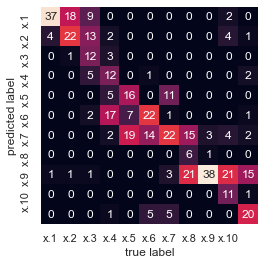

In [58]:
mat = confusion_matrix(y_test, pred2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=X_train.columns, yticklabels=X_train.columns)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Method A3: Naive Bayes

reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

## When to Use Naive Bayes
Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model. That said, they have several advantages:

They are extremely fast for both training and prediction

They provide straightforward probabilistic prediction

They are often very easily interpretable

They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification. If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

When the naive assumptions actually match the data (very rare in practice)

For very well-separated categories, when model complexity is less important

For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall). This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.


In [18]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Gaussian Naive Bayes
Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. Imagine that you have the following data:

In [20]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
pred3 = model3.predict(X_test)

print(np.unique(pred3, return_counts = True))

print(confusion_matrix(pred3, y_test))

print(classification_report(y_test, pred3, digits = 3))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64), array([55, 31, 21, 51, 35, 48, 28, 23, 67, 49, 54], dtype=int64))
[[32 10  0  0  0  0  0  0  0 13  0]
 [10 12  2  0  0  0  3  0  0  4  0]
 [ 0  9  8  2  0  0  0  0  0  2  0]
 [ 0  0 17 29  0  5  0  0  0  0  0]
 [ 0  0  0  0 22  6  6  1  0  0  0]
 [ 0  0  2 10  6 18  0  0  0  0 12]
 [ 0  0  0  0  5  0 13  5  4  0  1]
 [ 0  0  0  0  0  0  0 17  6  0  0]
 [ 0  1  0  0  9  1 15 11 21  5  4]
 [ 0  5  0  0  0  0  5  8 11 18  2]
 [ 0  5 13  1  0 12  0  0  0  0 23]]
              precision    recall  f1-score   support

           1      0.582     0.762     0.660        42
           2      0.387     0.286     0.329        42
           3      0.381     0.190     0.254        42
           4      0.569     0.690     0.624        42
           5      0.629     0.524     0.571        42
           6      0.375     0.429     0.400        42
           7      0.464     0.310     0.371        42
           8      0.739     0.405    

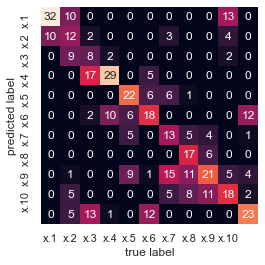

In [48]:
mat = confusion_matrix(y_test, pred3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=X_train.columns, yticklabels=X_train.columns)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Multinomial Naive Bayes
The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label. Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

In [40]:
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import make_pipeline
# model3_2 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model3_2 = MultinomialNB()

In [50]:
#Scale your training features to [0,1], because  for MultinomialNB, Input X must be non-negative
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.fit_transform(X_test)

In [51]:
model3_2.fit(X_train_scl , y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
pred3_2 = model3_2.predict(X_test_scl)

print(np.unique(pred3_2, return_counts = True))

print(confusion_matrix(pred3_2, y_test))

print(classification_report(y_test, pred3_2, digits = 3))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64), array([ 58,  13,  34, 104,  58,  19,  15,  30,  31,  81,  19], dtype=int64))
[[31 20  0  0  0  0  0  0  0  7  0]
 [ 3  5  5  0  0  0  0  0  0  0  0]
 [ 2  8  6  0  0  6  3  0  2  2  5]
 [ 0  0 28 30 13 17  4  0  0  0 12]
 [ 0  0  0  6 15 10 22  5  0  0  0]
 [ 0  0  2  6  6  3  1  0  0  0  1]
 [ 0  0  0  0  8  2  5  0  0  0  0]
 [ 0  0  0  0  0  0  0 19 11  0  0]
 [ 0  0  0  0  0  0  7  6  4  0 14]
 [ 6  5  0  0  0  0  0 12 25 33  0]
 [ 0  4  1  0  0  4  0  0  0  0 10]]
              precision    recall  f1-score   support

           1      0.534     0.738     0.620        42
           2      0.385     0.119     0.182        42
           3      0.176     0.143     0.158        42
           4      0.288     0.714     0.411        42
           5      0.259     0.357     0.300        42
           6      0.158     0.071     0.098        42
           7      0.333     0.119     0.175        42
           8      0.633   

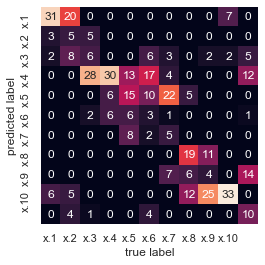

In [56]:
mat = confusion_matrix(y_test, pred3_2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=X_train.columns, yticklabels=X_train.columns)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Method A4: (multinomial) logisitic regression) 

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [6]:
### Standardize Features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [7]:
#Create multinomial Logistic Regression
# Create one-vs-rest logistic regression object
clf = LogisticRegression(random_state = 0, multi_class = 'multinomial', solver = 'newton-cg')

In [8]:
# train model
model4 = clf.fit(X_train_std, y_train)

In [9]:
###  Prediction
pred4 = model4.predict(X_test_std)

In [10]:
pred4

array([ 1,  1,  2,  4,  7,  7,  6,  8, 11, 10,  9,  1,  2,  2,  4,  7,  7,
        6,  8,  8,  1,  9,  1,  2,  2,  4,  7,  5,  2,  8,  9,  1,  1,  1,
        2,  2,  4,  7,  5,  2,  8,  9,  1,  9,  1,  2,  2,  3,  7, 11,  1,
        8,  9,  1,  9,  1,  2,  3,  3,  7, 11,  6,  8,  9,  1, 10,  1,  1,
        4,  4,  4,  5,  7,  8,  9, 10, 11,  1,  1,  4,  4,  4,  5,  5,  8,
        8,  8, 11,  1,  1,  4,  4,  4,  5,  5,  8,  9,  8, 11,  1,  1,  4,
        4,  4,  5,  5,  8, 10, 10, 11,  1,  1,  4,  4,  5,  4,  5,  8, 10,
       10, 11,  1,  1,  4,  4,  5,  4, 11,  8, 10, 10, 11,  1,  1,  3,  4,
        7,  4,  9,  8,  8,  8, 11,  1,  1,  3,  4,  7, 11,  9,  8,  8, 10,
       11,  1,  1,  3,  4,  7,  6,  7,  8, 10, 10, 11,  1,  1,  4,  4,  5,
        6,  5,  8,  8, 10, 11,  1,  1,  3,  4,  5,  6,  5,  8,  8, 10, 11,
        1,  1,  3,  4,  5,  6,  5,  8,  8, 10,  1,  1,  1,  3,  4,  5,  4,
        7,  8,  9,  1, 11,  1,  1,  2,  4,  5,  4,  7, 10,  8,  1, 11,  1,
        1,  2,  4,  4,  4

In [15]:
### View Probability Observation Is Each Class
pred4prob = model4.predict_proba(X_test_std)
pred4prob

array([[7.17984035e-01, 5.26233173e-02, 1.93187795e-01, ...,
        7.91892010e-06, 1.57119039e-08, 8.17213477e-04],
       [5.89107649e-01, 4.03321262e-01, 1.43599427e-03, ...,
        1.59671294e-04, 4.84650427e-05, 5.85307425e-03],
       [5.94759557e-02, 4.78142648e-01, 3.63083405e-01, ...,
        1.87558492e-04, 1.02500846e-05, 8.88014615e-02],
       ...,
       [1.04434504e-03, 4.92777806e-02, 7.66257316e-05, ...,
        4.78447544e-01, 2.22708235e-01, 2.36088652e-01],
       [1.73419255e-04, 5.81552250e-02, 2.46748640e-02, ...,
        1.42019799e-02, 4.49424535e-03, 8.87087793e-01],
       [7.76142128e-04, 3.55300489e-01, 2.27077301e-01, ...,
        2.37050775e-02, 1.73463071e-03, 2.33588787e-01]])

In [16]:
np.shape(pred4prob)

(462, 11)

In [17]:
print(np.unique(pred4, return_counts = True))

print(confusion_matrix(pred4, y_test))

print(classification_report(y_test, pred4, digits = 3))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64), array([70, 37, 31, 62, 33, 65, 25, 44, 37, 22, 36], dtype=int64))
[[38 21  0  0  0  0  1  0  0  8  2]
 [ 4 19  9  0  0  0  2  0  2  0  1]
 [ 0  2 14  2  0  5  0  0  0  6  2]
 [ 0  0 13 29  9  8  1  0  0  0  2]
 [ 0  0  0  0  9  6 14  4  0  0  0]
 [ 0  0  6 11 13 17 10  0  0  0  8]
 [ 0  0  0  0 11  2  8  1  1  0  2]
 [ 0  0  0  0  0  0  0 23 12  9  0]
 [ 0  0  0  0  0  0  5 11 17  0  4]
 [ 0  0  0  0  0  0  0  3  5 13  1]
 [ 0  0  0  0  0  4  1  0  5  6 20]]
              precision    recall  f1-score   support

           1      0.543     0.905     0.679        42
           2      0.514     0.452     0.481        42
           3      0.452     0.333     0.384        42
           4      0.468     0.690     0.558        42
           5      0.273     0.214     0.240        42
           6      0.262     0.405     0.318        42
           7      0.320     0.190     0.239        42
           8      0.523     0.548    

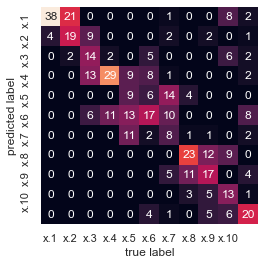

In [79]:
mat = confusion_matrix(y_test, pred4)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=X_train.columns, yticklabels=X_train.columns)
plt.xlabel('true label')
plt.ylabel('predicted label');